Problem 7: Transfer Matrix and Ising Chain in a Magnetic Field

(c) Compare your analytical results for the correlation length with simulation results. For
this purpose, calculate the spin-spin correlation function hsisj i as a function of distance
|i − j| for spins sufficiently far from the boundaries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import curve_fit

def initial_configuration(N):
    return np.ones(N)

def magnetization_config(config):
    return np.sum(config)

def Metropolis(config,betaJ,betaH,boundary):
    N =len(config)
    if boundary:
        index_flip = np.random.randint(1,N-1)
    else:
        index_flip = np.random.randint(0,N)
    
    alpha = np.random.random()
    beta_delta_E = betaJ*2*(config[index_flip]*config[(index_flip+1)%N]+config[(index_flip-1)%N]*config[index_flip])-2*betaH*config[index_flip]
    if beta_delta_E <= 0:
        config[index_flip] = -config[index_flip]
    elif np.exp(-beta_delta_E)>alpha:
        config[index_flip] = -config[index_flip]
    return config

def s0sj(j,config):
    return config[0]*config[j]

def analytic_corr_length(betaJ):
    return np.abs(1/np.log(np.tanh(betaJ)))

def ana_correlation_function(j,betaJ,betaH):
    sin_theta = np.exp(-betaJ)/np.sqrt(np.exp(-2*betaJ)+np.exp(2*betaJ)*np.sinh(betaH)**2)
    cos_theta = np.exp(betaJ)*np.sinh(betaH)/np.sqrt(np.exp(-2*betaJ)+np.exp(2*betaJ)*np.sinh(betaH)**2)
    lambda_plus = np.sqrt(np.exp(-2*betaJ)+np.exp(2*betaJ)*np.sinh(betaH)**2) + np.exp(betaJ)*np.cosh(betaH)
    lambda_minus=-np.sqrt(np.exp(-2*betaJ)+np.exp(2*betaJ)*np.sinh(betaH)**2) + np.exp(betaJ)*np.cosh(betaH)
    correlation_function = cos_theta**2+sin_theta**2*(lambda_plus/lambda_minus)**(-j)
    return correlation_function

In [11]:
analytic_corr_length(0.5)

1.295442784141215

Text(0.5, 0, '|i-j|')

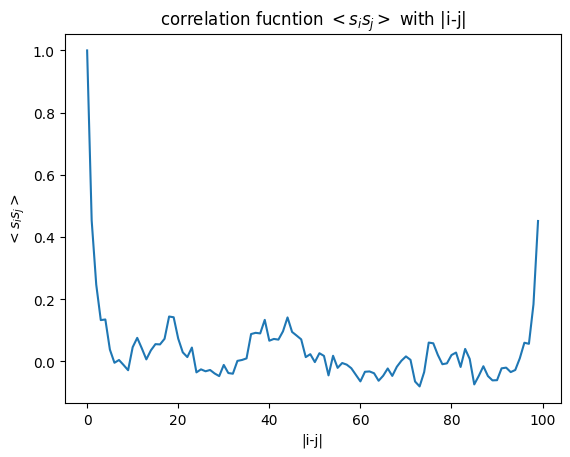

In [12]:
N = 100
betaJ,betaH = 0.5,0
boundary = False
MCsteps = int(N/2)
num_MCsteps = 1000

config = initial_configuration(N)
sisj_array = np.zeros(N)

for times in range(num_MCsteps*MCsteps):
    config = Metropolis(config,betaJ,betaH,boundary)

    if times>2*MCsteps:
        for j in range(N):
            sisj_array[j] += s0sj(j,config)
sisj_array=sisj_array/((num_MCsteps-2)*MCsteps)

plt.plot(sisj_array)
plt.title('correlation fucntion $<s_is_j>$ with |i-j|')
plt.ylabel('$<s_is_j>$')
plt.xlabel('|i-j|')
    


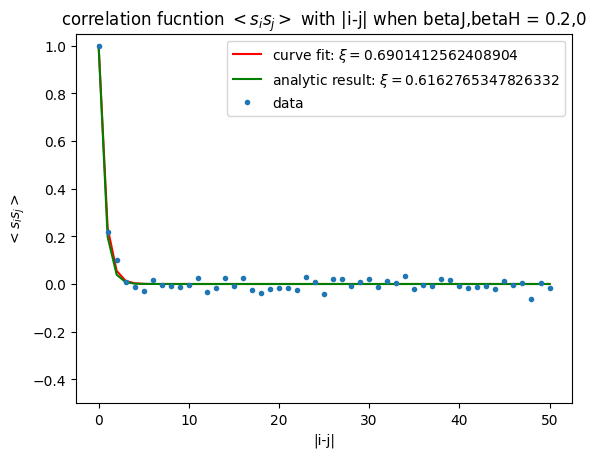

In [13]:
N = 100
betaJ,betaH = 0.2,0
boundary = False
MCsteps = int(N/2)
num_MCsteps = 1000

config = initial_configuration(N)
sisj_array = np.zeros(int(N/2)+1)

for times in range(num_MCsteps*MCsteps):
    config = Metropolis(config,betaJ,betaH,boundary)

    if times>2*MCsteps:
        for j in range(N+1):
            if j>int(N/2):
                sisj_array[(N-j)] += s0sj(j%N,config)
            elif j == int(N/2):
                sisj_array[j]+=2*s0sj(j,config)
            else:
                sisj_array[j] += s0sj(j,config)
sisj_array=sisj_array/((num_MCsteps-2)*MCsteps*2)

def func(x,length):
    return np.exp(-x/length)
i_jarray = np.linspace(0,MCsteps,MCsteps+1)
popt,pcov = curve_fit(func,i_jarray,sisj_array)
corr_func = func(i_jarray,*popt)
ana_func = func(i_jarray,analytic_corr_length(betaJ))
plt.plot(i_jarray,corr_func,color = 'red',label = r'curve fit: $\xi=$'+str(popt[0]))
plt.plot(i_jarray,ana_func,color = 'green',label = r'analytic result: $\xi=$'+str(analytic_corr_length(betaJ)))
plt.plot(sisj_array,'.',label = 'data')
plt.title('correlation fucntion $<s_is_j>$ with |i-j| when betaJ,betaH = '+str(betaJ)+','+str(betaH))
plt.ylabel('$<s_is_j>$')
plt.xlabel('|i-j|')
plt.ylim((-0.5,1.05))
plt.legend()
    


In [2]:
N = 100
betaJ,betaH = 0.5,0
boundary = False


def corr_length(N,betaJ,betaH,boundary):
    MCsteps = int(N/2)
    num_MCsteps = 1000

    config = initial_configuration(N)
    sisj_array = np.zeros(int(N/2)+1)

    for times in range(num_MCsteps*MCsteps):
        config = Metropolis(config,betaJ,betaH,boundary)

        if times>2*MCsteps:
            for j in range(N+1):
                if j>int(N/2):
                    sisj_array[(N-j)] += s0sj(j%N,config)
                elif j == int(N/2):
                    sisj_array[j]+=2*s0sj(j,config)
                else:
                    sisj_array[j] += s0sj(j,config)
    sisj_array=sisj_array/((num_MCsteps-2)*MCsteps*2)

    def func(x,length):
        return np.exp(-x/length)
    i_jarray = np.linspace(0,int(N/2),int(N/2)+1)
    popt,pcov = curve_fit(func,i_jarray,sisj_array)
    return popt[0] 
corr_length(N,betaJ,betaH,boundary)

1.0436745450428668

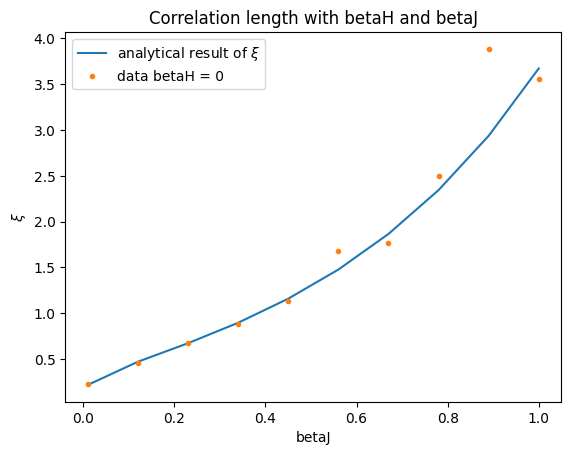

In [21]:
betaJ_arr = np.linspace(0.01,1,10)
betaH_arr = np.array([0])
boundary= False
N = 100

for betaH in betaH_arr:
    xi_list = []
    for betaJ in betaJ_arr:       
        xi = corr_length(N,betaJ,betaH,boundary)
        xi_list.append(xi)
    ana_func = analytic_corr_length(betaJ_arr)
    plt.plot(betaJ_arr,ana_func,label = r'analytical result of $\xi$')
    plt.plot(betaJ_arr,xi_list,'.',label = 'data betaH = '+str(np.round(betaH,2)))

plt.title('Correlation length with betaH and betaJ')
plt.xlabel('betaJ')
plt.ylabel(r'$\xi$')
plt.legend()


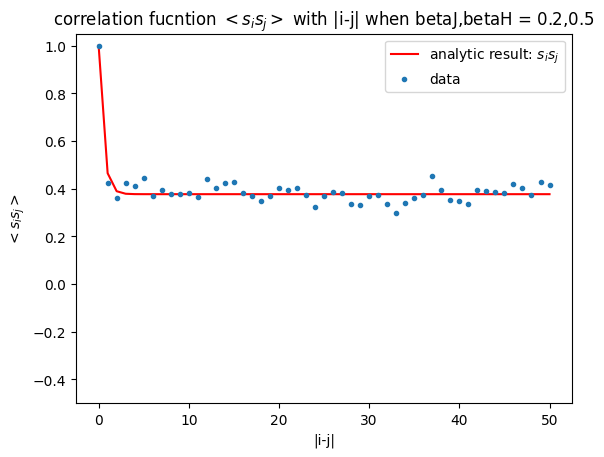

In [32]:
N = 100
betaJ,betaH = 0.2,0.5
boundary = False
MCsteps = int(N/2)
num_MCsteps = 1000

config = initial_configuration(N)
sisj_array = np.zeros(int(N/2)+1)

for times in range(num_MCsteps*MCsteps):
    config = Metropolis(config,betaJ,betaH,boundary)

    if times>2*MCsteps:
        for j in range(N+1):
            if j>int(N/2):
                sisj_array[(N-j)] += s0sj(j%N,config)
            elif j == int(N/2):
                sisj_array[j]+=2*s0sj(j,config)
            else:
                sisj_array[j] += s0sj(j,config)
sisj_array=sisj_array/((num_MCsteps-2)*MCsteps*2)

i_jarray = np.linspace(0,MCsteps,MCsteps+1)
ana_func = ana_correlation_function(i_jarray,betaJ,betaH)
plt.plot(i_jarray,ana_func,color = 'red',label = r'analytic result: $s_i s_j$')
plt.plot(sisj_array,'.',label = 'data')
plt.title('correlation fucntion $<s_is_j>$ with |i-j| when betaJ,betaH = '+str(betaJ)+','+str(betaH))
plt.ylabel('$<s_is_j>$')
plt.xlabel('|i-j|')
plt.ylim((-0.5,1.05))
plt.legend()
    


C:\Users\Xiongxiao Wang\AppData\Local\Temp\ipykernel_23292\3346624446.py:27: RuntimeWarning: overflow encountered in exp
  return np.exp(-x/length)


ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

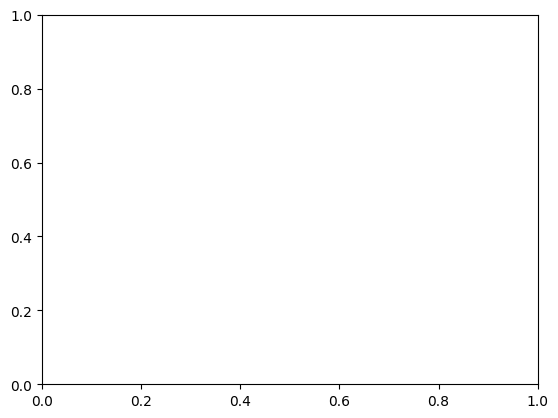

In [4]:
betaH_arr = np.linspace(0.01,1,10)
betaJ_arr = np.array([0.01])
boundary= False
N = 100

def analytic_corr_length_b(betaH):
    return 2*betaH
for betaJ in betaJ_arr:
    xi_list = []
    for betaH in betaH_arr:       
        xi = corr_length(N,betaJ,betaH,boundary)
        xi_list.append(xi)
    ana_func = analytic_corr_length_b(betaH_arr)
    plt.plot(betaJ_arr,ana_func,label = r'analytical result of $\xi$')
    plt.plot(betaJ_arr,xi_list,'.',label = 'data betaJ = '+str(np.round(betaJ,2)))

plt.title('Correlation length with betaH and betaJ')
plt.xlabel('betaJ')
plt.ylabel(r'$\xi$')
plt.legend()


(d) Investigate numerically the effect of the boundaries in the case of ++ (spin up) boundary
conditions and magnetic field in the opposite direction, by calculating the local magnetization as a function of the distance from the boundary. At which distance is the bulk
behavior recovered?

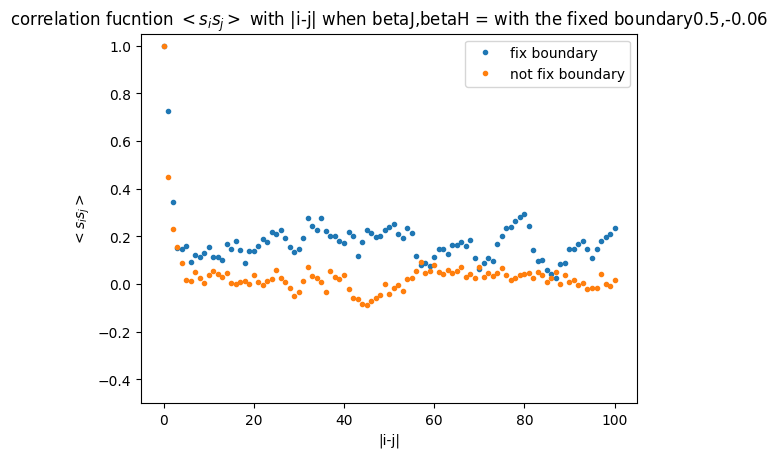

In [16]:
N = 200
betaJ,betaH = 0.5,-0.06
boundary = True
MCsteps = int(N/2)
num_MCsteps = 1000

config = initial_configuration(N)
sisj_array_fix = np.zeros(int(N/2)+1)
sisj_array_nofix = np.zeros(int(N/2)+1)

for times in range(num_MCsteps*MCsteps):
    config = Metropolis(config,betaJ,betaH,boundary)

    if times>2*MCsteps:
        for j in range(N+1):
            if j>int(N/2):
                sisj_array_fix[(N-j)] += s0sj(j%N,config)
            elif j == int(N/2):
                sisj_array_fix[j]+=2*s0sj(j,config)
            else:
                sisj_array_fix[j] += s0sj(j,config)
sisj_array_fix=sisj_array_fix/((num_MCsteps-2)*MCsteps*2)

for times in range(num_MCsteps*MCsteps):
    config = Metropolis(config,betaJ,betaH,boundary = False)

    if times>2*MCsteps:
        for j in range(N+1):
            if j>int(N/2):
                sisj_array_nofix[(N-j)] += s0sj(j%N,config)
            elif j == int(N/2):
                sisj_array_nofix[j]+=2*s0sj(j,config)
            else:
                sisj_array_nofix[j] += s0sj(j,config)
sisj_array_nofix=sisj_array_nofix/((num_MCsteps-2)*MCsteps*2)

def func(x,length):
    return np.exp(-x/length)
i_jarray = np.linspace(0,MCsteps,MCsteps+1)
plt.plot(sisj_array_fix,'.',label = 'fix boundary')
plt.plot(sisj_array_nofix,'.',label = 'not fix boundary')
plt.title('correlation fucntion $<s_is_j>$ with |i-j| when betaJ,betaH = with the fixed boundary'+str(betaJ)+','+str(betaH))
plt.ylabel('$<s_is_j>$')
plt.xlabel('|i-j|')
plt.ylim((-0.5,1.05))
plt.legend()
    
